In [1]:
""" Auto Encoder
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
"""
from __future__ import division, print_function, absolute_import
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

/Users/dawnstear/desktop/tensorflow_update/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dawnstear/desktop/tensorflow_update/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data  =  pd.read_csv('/Users/dawnstear/desktop/chop_cellpred/data.csv')  
print(np.shape(data))

(1078, 26596)


In [3]:
np.random.seed(42)
data = shuffle(data)
celltypes = data['TYPE'] # save cell type vector in case we need it later
labels = data['Labels'] # save labels
data_ = data.drop(['Labels','TYPE'],axis=1) 
cellcount, genecount = np.shape(data_)
X_train, X_test, y_train, y_test = train_test_split(data_.values,labels.values,
                                                    test_size=0.2,random_state=144)

In [6]:
# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 64
num_hidden_3 = 2 # 2nd layer num features (the latent dim)
num_input = genecount 

X = tf.placeholder("float", [None, num_input])

# Define weights & biases
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input,num_hidden_1]),name='ENC_WT_LAY1'),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1,num_hidden_2]),name='ENC_WT_LAY2'),
    'encoder_h3': tf.Variable(tf.random_normal([num_hidden_2,num_hidden_3]),name='ENC_WT_LAY3'),
    
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_3,num_hidden_2]),name='DEC_WT_LAY1'),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_2,num_hidden_1]),name='DEC_WT_LAY2'),
    'decoder_h3': tf.Variable(tf.random_normal([num_hidden_1,num_input]),name='DEC_WT_LAY3')
}


biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1]),name='enc_b_lay1'),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2]),name='enc_b_lay2'),
    'encoder_b3': tf.Variable(tf.random_normal([num_hidden_3]),name='enc_b_lay3'),
    
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_3]),name='dec_b_lay1'),
    'decoder_b2': tf.Variable(tf.random_normal([num_hidden_2]),name='dec_b_lay2'),
    'decoder_b3': tf.Variable(tf.random_normal([num_hidden_1]),name='dec_b_lay3'),
    'decoder_b4': tf.Variable(tf.random_normal([num_input]),name='dec_b_lay4'),
}


# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.elu(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    layer_2 = tf.nn.elu(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    layer_3 = tf.nn.elu(tf.add(tf.matmul(layer_2, weights['encoder_h3']),
                                   biases['encoder_b3']))
    return layer_3
# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['decoder_h3']),
                                   biases['decoder_b3']))
    output = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, weights['decoder_h4']),
                                   biases['decoder_b4']))
    
    return layer_3

In [7]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
y_true = X

learning_rate = 1e-3
# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

def next_batch(num, data, labels):  # from stack overflow
    idx = np.arange(0,len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)



ValueError: Dimensions must be equal, but are 64 and 2 for 'Add_7' (op: 'Add') with input shapes: [?,64], [2].

Epoch 0- Average Loss: 17.359403252601624
Epoch 0- Average Loss2: 17.359403252601624
Epoch 1- Average Loss: 17.455153703689575
Epoch 1- Average Loss2: 17.455153703689575
Epoch 2- Average Loss: 17.04418683052063
Epoch 2- Average Loss2: 17.04418683052063
Epoch 3- Average Loss: 18.026416540145874
Epoch 3- Average Loss2: 18.026416540145874
Epoch 4- Average Loss: 17.528510808944702
Epoch 4- Average Loss2: 17.528510808944702
Epoch 5- Average Loss: 17.87131953239441
Epoch 5- Average Loss2: 17.87131953239441
Epoch 6- Average Loss: 17.019577980041504
Epoch 6- Average Loss2: 17.019577980041504
Epoch 7- Average Loss: 17.79897952079773
Epoch 7- Average Loss2: 17.79897952079773
Epoch 8- Average Loss: 17.10980784893036
Epoch 8- Average Loss2: 17.10980784893036
Epoch 9- Average Loss: 16.944681763648987
Epoch 9- Average Loss2: 16.944681763648987
Epoch 10- Average Loss: 17.761274814605713
Epoch 10- Average Loss2: 17.761274814605713
Epoch 11- Average Loss: 17.832738161087036
Epoch 11- Average Loss2: 17.

ValueError: x and y must have same first dimension, but have shapes (40,) and (80,)

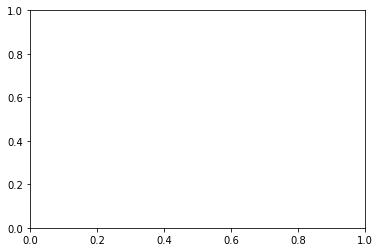

In [46]:
# Training Parameters
n_epochs = 40
batch_size = 128
n_batches = cellcount//batch_size
init = tf.global_variables_initializer()
TrainLossVec = []
start = time.time()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        avg_loss = 0
        
        for iteration in range(n_batches):
            X_batch, y_batch = next_batch(batch_size, X_train, y_train)
            _, l = sess.run([optimizer, loss], feed_dict={X: X_batch})
            avg_loss += l
            
        avg_loss = avg_loss/n_batches    
        TrainLossVec = np.append(TrainLossVec,avg_loss)     
        print('Epoch %s- Average Loss: %s' % (epoch,avg_loss))

    encodings = sess.run('ENC_WT_LAY2:0')  
    
print('Elapsed Training time: %s for %s epochs' % (n_epochs, time.time()-start))

# *--------------- Plot Results -------------------*   
fig, ax = plt.subplots()
ax.plot(range(n_epochs),TrainLossVec)
#ax.plot(range(n_epochs),TrainLossVec)
ax.set(xlabel='Epoch', ylabel='Train Loss',title='Loss Over Training Phase') # include time//epoch//batch size in title
ax.grid()


(256, 2)
<tf.Variable 'ENC_WT_LAY2:0' shape=(256, 2) dtype=float32_ref>


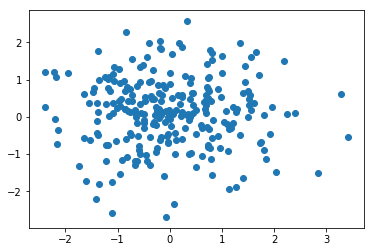

In [50]:
print(np.shape(encodings))
print(weights['encoder_h2'])

latent_x = [row[0] for row in encodings]
latent_y = [row[1] for row in encodings]
plt.scatter(latent_x,latent_y,cmap=labels)

In [35]:
#encodings = np.asmatrix(encodings)
encodings = np.asarray(encodings)

256

matrix([[ 7.24999487e-01,  9.77560878e-01],
        [ 1.86306131e+00, -3.35028201e-01],
        [-8.23368609e-01, -2.44141147e-01],
        [ 5.03290951e-01,  1.31557393e+00],
        [ 1.61885691e+00, -6.39433920e-01],
        [-1.66169071e+00, -4.18502927e-01],
        [ 1.43295228e+00,  1.49521339e+00],
        [-5.20312190e-01,  1.76975381e+00],
        [-1.15121722e+00,  7.85858989e-01],
        [-6.39720261e-01, -1.63749135e+00],
        [-4.73735869e-01, -4.17380512e-01],
        [-8.54777753e-01,  7.65781105e-01],
        [ 8.58925700e-01, -1.41627729e+00],
        [-2.88774818e-01,  3.82592916e-01],
        [ 1.96921483e-01,  3.04999590e-01],
        [-1.82092154e+00, -8.79875839e-01],
        [-5.08331731e-02, -1.64963377e+00],
        [ 8.67674589e-01,  1.23840265e-01],
        [-5.01717746e-01,  1.97549760e-01],
        [ 3.48130852e-01,  1.02979922e+00],
        [ 1.78451300e-01, -9.72889125e-01],
        [ 4.65842783e-02, -3.43454480e-01],
        [ 6.06326520e-01, -6.386